In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

import sys
sys.path.append("..")

from toy_mdp_helper import generate_dataset, evaluate_diffusionQ, extract_deterministic_policy, visualize_policy_heatmap
from toy_mdp_helper import  visualize_policy_heatmap_continuous

In [33]:
hyperparams = {
    'N_diffusion_steps':30,
    'schedule_type': "vp",
    'abs_action_max': 1.0,
    'gamma': 0.99,
    'lr': 5e-3,
    'decay_lr': False,
    'weight_decay': 0.001,
    'num_critics': 2,
    'lcb_coef': 0.0,
    'q_sample_eta': 1.0,
    'weight_entropy_loss': 0.0,
    'weight_q_loss': 1.0,
    'approximate_action': True,
    'ema_tau': 0.005,
    'ema_period': 20,
    'ema_begin_update': 1000,
    'layer_norm': False,
    'device': 'cuda',
}

N_s = 10
N_a = 10
LEN_dataset = 5000

rb_capacity = LEN_dataset
dataset, policy_mdp, P, R = generate_dataset(LEN_dataset, N_s, N_a, seed=995)

from DiffusionQL.DQL_Q_esmb import DQL_Q_esmb as Agent
print(f"Expert's Reward:{np.mean(dataset['rewards'])}")

eta = 0.01
sample_method = "EAS" 

agent = Agent(state_dim=1, action_dim=1, **hyperparams)
agent.load_model("Results/mdp", "best")
  
_, frequency_DQ = extract_deterministic_policy(agent, N_s, N_a, sample_method=sample_method, N_sample=50, N_sampling=1000, eta=eta)
#reward_DQ, _ = evaluate_diffusionQ(agent, R, P, N_s, N_a, N_iter=1000, sample_method=sample_method, N_sample=50, eta=eta)
#print(f"Reward: {reward_DQ}")


Value Iteration: 100%|██████████| 1000/1000 [00:00<00:00, 1324.98it/s, V=-87.638921]
c:\Users\Ye\Documents\YuYeh_Documents\L2S\Projects\diffusion_resource_schduling_intra_slice\Examples\..\DiffusionQL\DQL_Q_esmb.py:205: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded

Expert's Reward:0.874268878606705


Plot saved to: continuous_policy.png


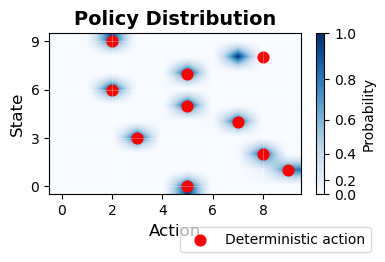

In [34]:
visualize_policy_heatmap_continuous(
    frequency_heatmap=frequency_DQ,
    policy_deterministic=policy_mdp,
    title="Policy Distribution",
    save_path="continuous_policy.png",
    figsize=(4, 3),
    interpolation="bilinear",
    xtick_step=2,
    ytick_step=3,
    bbox_to_anchor=(0.9, -0.4)
)